In [1]:
import pandas as pd
import numpy as np

In [3]:
CSV_PATH = "diffusiondb-2m_random_5k-master-annotations_with_binaries.csv"  # adjust path if needed

df = (
    pd.read_csv(CSV_PATH, usecols=["text_summated_binary", "img_binary"])
      .rename(columns={
          "text_summated_binary": "prompt_label",
          "img_binary": "image_label"
      })
)

In [7]:
print(df.head())
print("\nLabel counts:")
print(df["prompt_label"].value_counts())
print(df["image_label"].value_counts())

   image_label  prompt_label
0            1             1
1            1             1
2            0             1
3            1             1
4            0             1

Label counts:
prompt_label
1    4482
0     518
Name: count, dtype: int64
image_label
0    2690
1    2310
Name: count, dtype: int64


In [8]:
for pl,group in df.groupby("prompt_label"):
    miss_rate = sum(group["image_label"] != pl) / group.shape[0]
    print(pl, miss_rate)

0 0.4247104247104247
1 0.533690316822847


In [9]:
# Bootstrap the sample
all_mrs = []
for i in range(1000):
    bt_df = df.sample(frac=1, replace=True)

    local_mr = {}
    for pl,group in bt_df.groupby("prompt_label"):
        miss_rate = sum(group["image_label"] != pl) / group.shape[0]
        local_mr[pl] = miss_rate

    all_mrs.append(local_mr)

<Axes: ylabel='Frequency'>

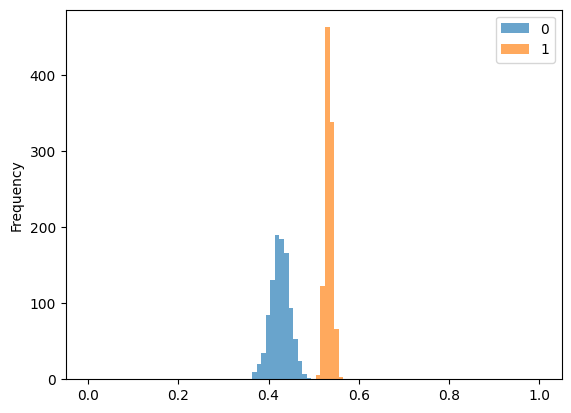

In [10]:
mr_df = pd.DataFrame(all_mrs)
mr_df.plot.hist(bins=np.linspace(0,1,100), alpha=0.67)


In [11]:
from scipy.stats import ttest_ind

In [12]:
ttest_ind(mr_df[0], mr_df[1], alternative="less")

TtestResult(statistic=np.float64(-151.26919543795847), pvalue=np.float64(0.0), df=np.float64(1998.0))

In [13]:
mr_df["diff"] = mr_df[0] - mr_df[1]

<Axes: ylabel='Frequency'>

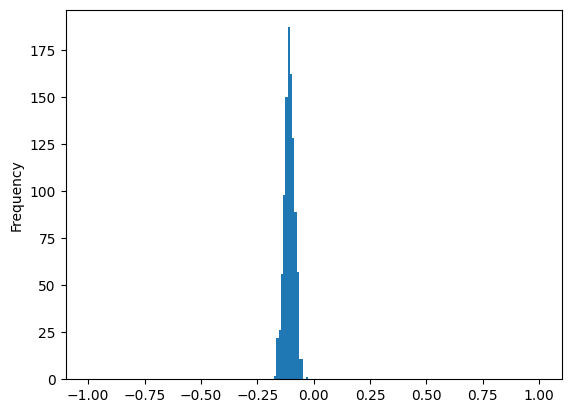

In [14]:
mr_df["diff"].plot.hist(bins=np.linspace(-1,1,200))

In [15]:
from scipy.stats import ttest_1samp

In [16]:
ttest_1samp(mr_df["diff"], popmean=0.0, alternative="less")

TtestResult(statistic=np.float64(-150.1855902820807), pvalue=np.float64(0.0), df=np.int64(999))